In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import copy
import matplotlib
import matplotlib.pyplot as plt

# let's import our file for the analysis:
json_file = './data/sensor1_sleep.json'

with open(json_file, 'r') as infile:
  json_data = json.load(infile)

In [ ]:
# what is this file?
type(json_data)

In [72]:
# let's see what elements do we have in the dictionary
for element in json_data:
  print(element)

readiness
restful_periods
sleep


In [73]:
# we are interested in sleep! let's focus on that element
# find out what do we have inside the 'sleep' element
type(json_data['sleep'])

list

In [74]:
# let's access the first element of this list

# -- write your code --

lis = json_data['sleep']
lis[0]

{'awake': 2760,
 'bedtime_end': '2020-01-14T05:31:00-08:00',
 'bedtime_end_delta': 24480,
 'bedtime_start': '2020-01-13T22:41:00-08:00',
 'bedtime_start_delta': 60,
 'breath_average': 14.125,
 'deep': 3990,
 'duration': 24420,
 'efficiency': 89,
 'hr_5min': [0,
  53,
  54,
  56,
  56,
  55,
  56,
  56,
  56,
  56,
  55,
  55,
  56,
  61,
  62,
  61,
  60,
  60,
  60,
  59,
  59,
  59,
  60,
  60,
  57,
  55,
  55,
  56,
  57,
  56,
  56,
  0,
  57,
  58,
  63,
  0,
  53,
  54,
  56,
  56,
  55,
  56,
  56,
  56,
  56,
  55,
  55,
  56,
  61,
  62,
  61,
  60,
  60,
  60,
  59,
  59,
  59,
  60,
  60,
  57,
  55,
  55,
  56,
  57,
  56,
  56,
  0,
  57,
  58,
  63],
 'hr_average': 57.54,
 'hr_lowest': 53,
 'hypnogram_5min': '2222211111444422222344222222222221122222224333322222333332222232222222111113333444',
 'is_longest': 1,
 'light': 12930,
 'midpoint_at_delta': 12310,
 'midpoint_time': 12790,
 'onset_latency': 30,
 'period_id': 0,
 'rem': 4740,
 'restless': 31,
 'rmssd': 57,
 'rmssd_

In [75]:
# let's find the element related to the day of interest! do we have one element per day?

# 1. let's find how many days are there

# -- write your code --
len(lis)

5

In [76]:
# 2. let's find the index of the day of interest; for each day, let's print bedtime_end , so we will know 
# which element to use (the night is between 15 and 16 of Jan 2020)

# -- write your code --
bedtime_end1 = json_data['sleep'][0]['bedtime_end']
bedtime_end2 = json_data['sleep'][1]['bedtime_end']
bedtime_end3 = json_data['sleep'][2]['bedtime_end']
bedtime_end4 = json_data['sleep'][3]['bedtime_end']
bedtime_end5 = json_data['sleep'][4]['bedtime_end']
print(bedtime_end1)
print(bedtime_end2)
print(bedtime_end3)
print(bedtime_end4) 
print(bedtime_end5) 

2020-01-14T05:31:00-08:00
2020-01-15T07:38:02-08:00
2020-01-16T06:09:04-08:00
2020-01-17T06:48:00-08:00
2020-01-18T06:52:00-08:00


In [77]:
# 3. let's find the time the participant went to bed, and when s/he woke up 
night_index = 2
print('Night starts at: '+json_data['sleep'][night_index]['bedtime_start'])
print('Night end at: '+json_data['sleep'][night_index]['bedtime_end'])

Night starts at: 2020-01-15T22:54:04-08:00
Night end at: 2020-01-16T06:09:04-08:00


In [78]:
# 4. total time in bed: put the total time spent in bed by the participant (calculate it manually)

# -- write your code --
## The time from 22:54 to 06:09 is 7 hours and 15 minutes

In [79]:
# 5. let's extract the hypnogram !
# the code is written for you, but verify step by step what is happening (add comments)!

#'1' = deep (N3) sleep - '2' = light (N1 or N2) sleep - '3' = REM sleep - '4' = awake
dic_sleep = {'wake':4 , 'deep':1, 'light':2 , 'rem':3}

hypno_js = json_data['sleep'][night_index]['hypnogram_5min']

hypno = np.array(list(hypno_js)) 

# we have 1 value every 5 minutes; we need 1 value every 30 seconds (to compare it with gold standard)
# let's have each element repeated 10 times (2 per minute)
hypno = np.repeat(hypno,10)
hypno = hypno.astype(int)

In [80]:
# 6. let's verify hypnogram is the right length 
len(hypno)

870

In [81]:
# 7. let's write down the hypnogram to export,
# we need to write the phase of sleep (from 1 to 4) from 11:00pm to 6:00am , with sleep phase for each 30 seconds
total_number_30sec_int = 7*60*2

df = pd.DataFrame(columns = ['IndexTime','SleepPhase'])
df['IndexTime'] = range(total_number_30sec_int)

# let's cut the first and last minutes of hypno (outside the range of interest)
minutes_before_11pm = 6
minutes_after_6am = 9

# I consider only hypno in the range of interest
df['SleepPhase'] = hypno[minutes_before_11pm*2:-minutes_after_6am*2]
df

,IndexTime,SleepPhase
0,0,4
1,1,4
2,2,4
3,3,4
4,4,4
5,5,4
6,6,4
7,7,4
8,8,4
9,9,4


In [82]:
# 8. let's save the final csv file
df.to_csv('sensor_1_output.csv', index=False)

In [83]:
# 9. let's calculate amount of sleep per phase
# in number of intervals
# in percentage over the 7 hours of analysis

# -- write your code --
sum_of_phases = df.groupby(["SleepPhase"]).count()/8.4
sum_of_phases

,IndexTime
SleepPhase,
1,20.238095
2,40.476190
3,27.619048
4,11.666667


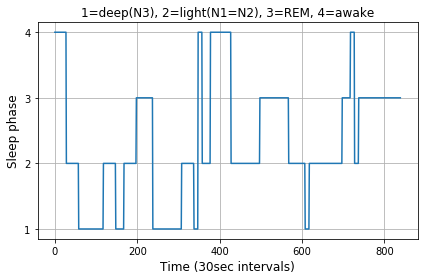

In [91]:
# 10. let's print the hypnogram! 

def plot_hypno(signal): #,color
  x = np.arange(len(signal))
  y = signal
  
  fontsizeV = 12
  mpl.plot(x,y) #color=color
  mpl.xlabel('Time (30sec intervals)',fontsize=fontsizeV)
  mpl.ylabel('Sleep phase',fontsize=fontsizeV)
  mpl.yticks([1,2,3,4])
  mpl.title('1=deep(N3), 2=light(N1=N2), 3=REM, 4=awake')
  mpl.grid(True)
  mpl.tight_layout()
plotted_table = df["SleepPhase"]
plot_hypno(plotted_table)